<a href="https://colab.research.google.com/github/Rk-Pudasaini/Forecasting-Commodities-Future-Prices/blob/main/Dataset_cleaning__analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# # --- Step 1: Read the two datasets ---
# df1 = pd.read_csv("/content/kalimati tarkari price 2013-2021.csv")
# df2 = pd.read_csv("/content/kalimati tarkari price 2021 to 2023.csv")
# # --- Step 2: Merge them (stack rows) ---
# df = pd.concat([df1, df2], ignore_index=True)

# # --- Step 3: Remove the SN column if it exists ---
# if "SN" in df.columns:
#     df = df.drop(columns=["SN"])

# # --- Step 4: Count NaN before cleaning ---
# print("NaN count before cleaning:")
# print(df.isnull().sum())

# # --- Step 5: Remove rows with any NaN ---
# df = df.dropna(how="any")

# # --- Step 6: Count NaN after cleaning ---
# print("\nNaN count after cleaning:")
# print(df.isnull().sum())

# # --- Step 7: Save cleaned dataset ---
# df.to_csv("kalimati_dataset.csv", index=False)

# print("\n✅ Cleaning complete. Saved as 'kalimati_dataset.csv'")


In [ ]:
df = pd.read_csv("/content/kalimati_dataset.csv")

/tmp/ipython-input-3328634939.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/kalimati_dataset.csv")


In [ ]:
df.shape

(292521, 6)

In [ ]:
df.head()

,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),16/06/2013,Kg,35,40,37.5
1,Tomato Small(Local),16/06/2013,Kg,26,32,29.0
2,Potato Red,16/06/2013,Kg,20,21,20.5
3,Potato White,16/06/2013,Kg,15,16,15.5
4,Onion Dry (Indian),16/06/2013,Kg,28,30,29.0


In [ ]:
df.tail()

,Commodity,Date,Unit,Minimum,Maximum,Average
292516,Tomato Small(Indian),28/09/2023,KG,Rs 45.00,Rs 55.00,Rs 50.00
292517,Tomato Small(Local),28/09/2023,KG,Rs 50.00,Rs 60.00,Rs 55.00
292518,Tomato Small(Tunnel),28/09/2023,KG,Rs 60.00,Rs 75.00,Rs 69.00
292519,Turnip A,28/09/2023,KG,Rs 70.00,Rs 80.00,Rs 75.00
292520,Water Melon(Green),28/09/2023,KG,Rs 50.00,Rs 60.00,Rs 56.67


In [ ]:
df.dtypes

,0
Commodity,object
Date,object
Unit,object
Minimum,object
Maximum,object
Average,object


In [ ]:
# Convert 'Minimum' column to numeric, removing 'Rs' if present
df['Minimum'] = pd.to_numeric(df['Minimum'].apply(lambda x: str(x).replace('Rs', '').strip()))
df['Maximum'] = pd.to_numeric(df['Maximum'].apply(lambda x: str(x).replace('Rs', '').strip()))
df['Average'] = pd.to_numeric(df['Average'].apply(lambda x: str(x).replace('Rs', '').strip()))


In [ ]:
from dateutil import parser

# function to format the date columns in year-month-day type
def format_date(date):
    try:
        parsed_date = parser.parse(date)
        standardized_date = parsed_date.strftime("%Y-%m-%d")
        return standardized_date
    except Exception as e:
        return pd.NaT  # Return NaT (Not a Time) for invalid dates

# Apply the function to the 'Date' column
df['Date'] = df['Date'].apply(format_date).astype('datetime64[ns]')

In [ ]:
df.dtypes

,0
Commodity,object
Date,datetime64[ns]
Unit,object
Minimum,float64
Maximum,float64
Average,float64


In [ ]:
total_commodities = df['Commodity'].unique()

# Now total_commodities contains an array of unique commodity names
print(f'Total Number of Commodities sold in Kalimati tarkari bazar: {len(total_commodities)}')
print(total_commodities)

Total Number of Commodities sold in Kalimati tarkari bazar: 136
['Tomato Big(Nepali)' 'Tomato Small(Local)' 'Potato Red' 'Potato White'
 'Onion Dry (Indian)' 'Carrot(Local)' 'Cabbage(Local)' 'Cauli Local'
 'Raddish Red' 'Raddish White(Local)' 'Brinjal Long' 'Brinjal Round'
 'Cow pea(Long)' 'Green Peas' 'French Bean(Local)' 'Soyabean Green'
 'Bitter Gourd' 'Bottle Gourd' 'Pointed Gourd(Local)' 'Snake Gourd'
 'Smooth Gourd' 'Sponge Gourd' 'Pumpkin' 'Squash(Long)' 'Turnip' 'Okara'
 'Christophine' 'Brd Leaf Mustard' 'Spinach Leaf' 'Cress Leaf'
 'Mustard Leaf' 'Fenugreek Leaf' 'Onion Green' 'Mushroom(Kanya)'
 'Asparagus' 'Neuro' 'Brocauli' 'Sugarbeet' 'Drumstick' 'Red Cabbbage'
 'Lettuce' 'Celery' 'Parseley' 'Fennel Leaf' 'Mint' 'Turnip A' 'Tamarind'
 'Bamboo Shoot' 'Tofu' 'Gundruk' 'Apple(Jholey)' 'Banana' 'Lime'
 'Pomegranate' 'Mango(Maldah)' 'Grapes(Green)' 'Water Melon(Green)'
 'Sweet Orange' 'Pineapple' 'Cucumber(Local)' 'Jack Fruit'
 'Papaya(Nepali)' 'Sugarcane' 'Ginger' 'Chilli Dry' 

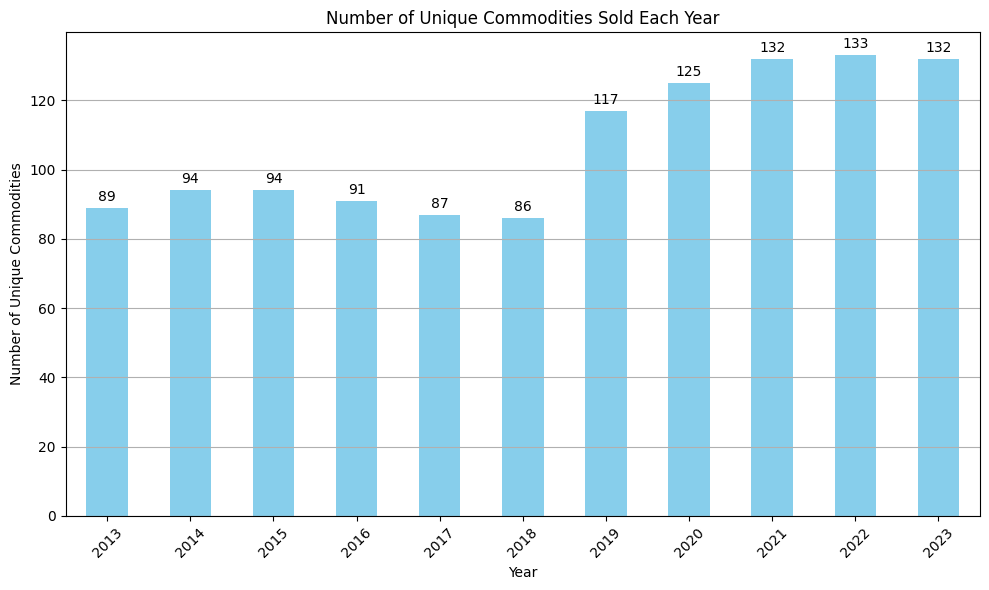

In [ ]:
# Group the data by year and count the number of unique commodities sold each year
commodities_per_year = df.groupby(df['Date'].dt.year)['Commodity'].nunique()

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = commodities_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Commodities Sold Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Commodities')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines only on the y-axis

# Annotate each bar with its count value
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()),
                 ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

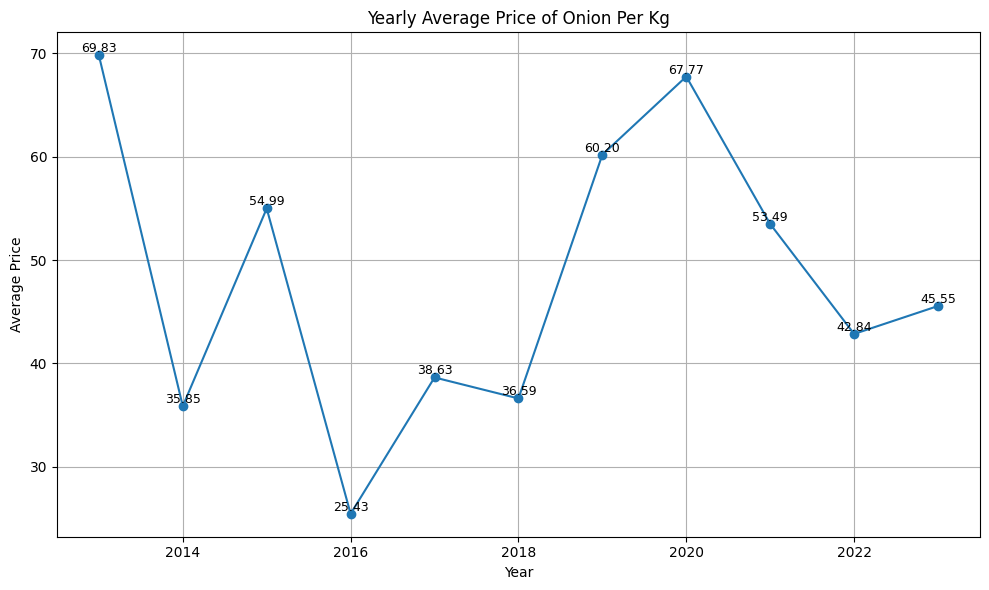

In [ ]:

# Filter Onion Dry (Indian)
df_onion = df[df['Commodity'] == "Onion Dry (Indian)"]

# Group by year and month, then calculate monthly average
monthly_avg_price = df_onion.groupby([df_onion['Date'].dt.year,
                                      df_onion['Date'].dt.month])['Average'].mean()

# Group by year and calculate yearly average
yearly_avg_price = monthly_avg_price.groupby(level=0).mean()

# Plot the yearly average prices
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_price.index, yearly_avg_price.values, marker='o', linestyle='-')

# Add value labels to each point
for x, y in zip(yearly_avg_price.index, yearly_avg_price.values):
    plt.text(x, y, f"{y:.2f}", ha='center', va='bottom', fontsize=9)

plt.title('Yearly Average Price of Onion Per Kg')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()


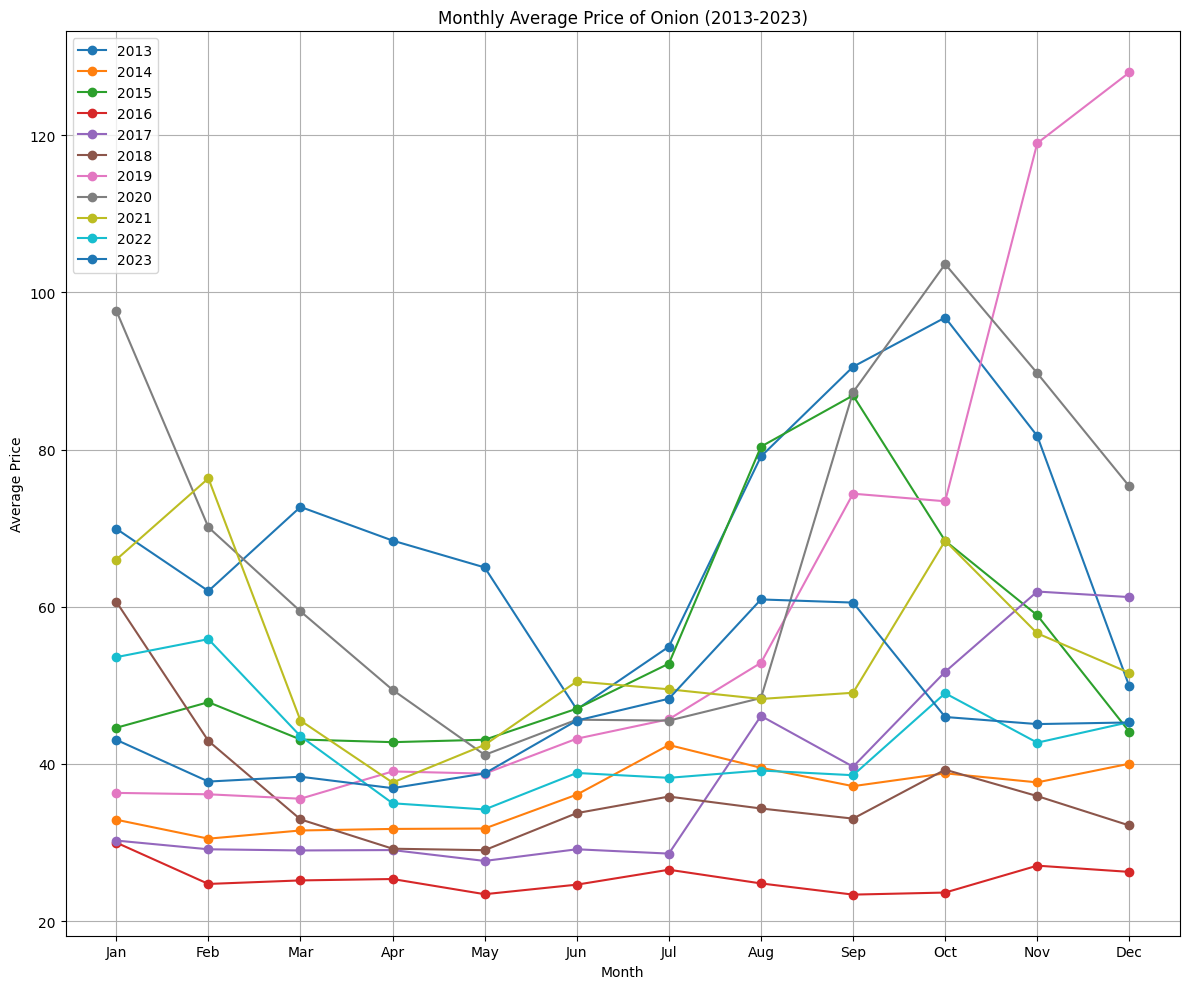

In [ ]:
# Plot the monthly average prices for each year
plt.figure(figsize=(12, 10))
for year in range(2013, 2024):
    yearly_avg_price = monthly_avg_price.xs(year)
    plt.plot(yearly_avg_price.index, yearly_avg_price.values, marker='o', linestyle='-', label=year)

plt.title('Monthly Average Price of Onion (2013-2023)')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

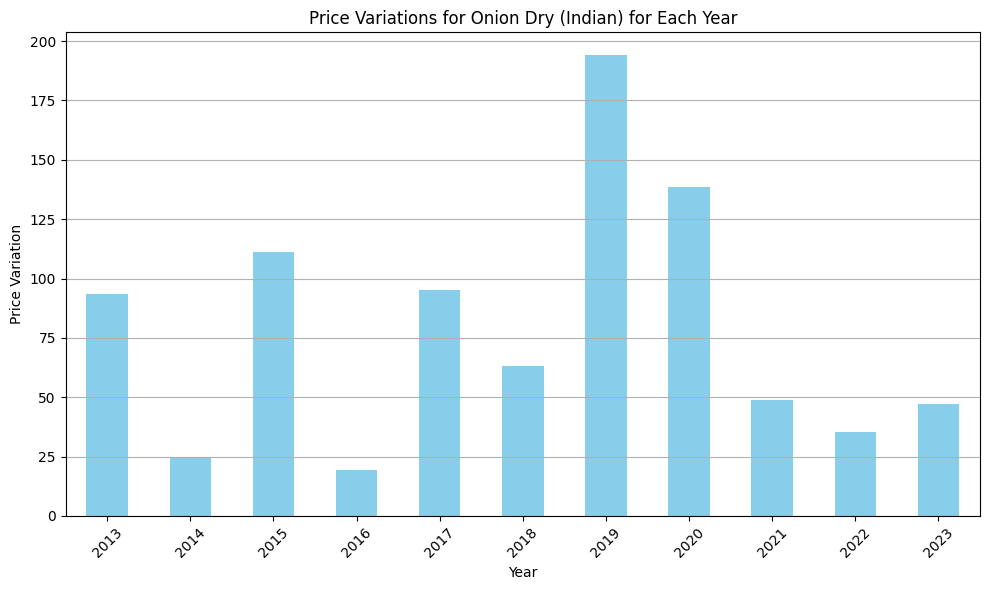

In [ ]:
def plot_variation_bar(df, commodity):

    # Filter the DataFrame for the specified commodity
    commodity_df = df[df['Commodity'] == commodity]

    # Group by year and calculate the price variation (difference between maximum and minimum prices) for each year
    price_variation_by_year = commodity_df.groupby(commodity_df['Date'].dt.year)['Average'].apply(lambda x: x.max() - x.min())

    # Plot the price variations for the specified commodity for each year
    plt.figure(figsize=(10, 6))
    price_variation_by_year.plot(kind='bar', color='skyblue')
    plt.title(f'Price Variations for {commodity} for Each Year')
    plt.xlabel('Year')
    plt.ylabel('Price Variation')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_variation_bar(df, 'Onion Dry (Indian)')


# Seasonal Analysis


In [15]:
df.head()

,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0


In [18]:
df = df_onion
df.head()

,Commodity,Date,Unit,Minimum,Maximum,Average
4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0
78,Onion Dry (Indian),2013-06-17,Kg,29.0,30.0,29.5
151,Onion Dry (Indian),2013-06-18,Kg,33.0,35.0,34.0
224,Onion Dry (Indian),2013-06-19,Kg,34.0,35.0,34.5
297,Onion Dry (Indian),2013-06-20,Kg,35.0,36.0,35.5


### Extract Year, Months and Day from date

In [20]:
import calendar

# Extract year, month, and day components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Map month numbers to month names
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])

# Map day numbers to day names
df['Day'] = df['Date'].dt.day_name()

In [21]:
df.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Year,Month,Day
4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0,2013,June,Sunday
78,Onion Dry (Indian),2013-06-17,Kg,29.0,30.0,29.5,2013,June,Monday
151,Onion Dry (Indian),2013-06-18,Kg,33.0,35.0,34.0,2013,June,Tuesday
224,Onion Dry (Indian),2013-06-19,Kg,34.0,35.0,34.5,2013,June,Wednesday
297,Onion Dry (Indian),2013-06-20,Kg,35.0,36.0,35.5,2013,June,Thursday


In [22]:
#Mapping Months to the seasons
map_month_to_season = {
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Autumn',
    'October': 'Autumn',
    'November': 'Autumn',
    'December': 'Winter'
}

df["Season"] = df["Month"].map(map_month_to_season)
df.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Year,Month,Day,Season
4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0,2013,June,Sunday,Summer
78,Onion Dry (Indian),2013-06-17,Kg,29.0,30.0,29.5,2013,June,Monday,Summer
151,Onion Dry (Indian),2013-06-18,Kg,33.0,35.0,34.0,2013,June,Tuesday,Summer
224,Onion Dry (Indian),2013-06-19,Kg,34.0,35.0,34.5,2013,June,Wednesday,Summer
297,Onion Dry (Indian),2013-06-20,Kg,35.0,36.0,35.5,2013,June,Thursday,Summer


In [24]:
#mean average prices for commodity per season
mean_average_commodities_per_season = df.groupby(["Season", "Commodity"])["Average"].mean().unstack(level=0).fillna(value=0)
mean_average_commodities_per_season.head()

Season,Autumn,Spring,Summer,Winter
Commodity,,,,
Onion Dry (Indian),58.262659,37.261735,43.747947,51.233906
